# Introduction/Business Problem

### In the state of Texas, an aspiring chef is looking to open a restaurant. He needs to know two different things:

### i) Which are the top 5 cities with the least number of restaurants?
### ii) What cusine is the most viable to open in these selected neighbourhoods?

# Describing the Data

### One dataset will be used for attempting to answer the business problem, providing both the geographical coordinates of the cities as well as the population of the cities

### https://public.opendatasoft.com/explore/dataset/1000-largest-us-cities-by-population-with-geographic-coordinates/table/?sort=-rank&refine.state=Texas&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6IjEwMDAtbGFyZ2VzdC11cy1jaXRpZXMtYnktcG9wdWxhdGlvbi13aXRoLWdlb2dyYXBoaWMtY29vcmRpbmF0ZXMiLCJvcHRpb25zIjp7InNvcnQiOiItcmFuayIsInJlZmluZS5zdGF0ZSI6IlRleGFzIn19LCJjaGFydHMiOlt7ImFsaWduTW9udGgiOnRydWUsInR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJyYW5rIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiI0ZGNTE1QSJ9XSwieEF4aXMiOiJjaXR5IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=5,30.67415,-100.1912&basemap=jawg.streets


### Methodology: To find out the population and the number of restaurants in each city (as shown by Foursquare), and then recommend a city to open a restaurant in and decide on the appropriate cusine of restaurant to open.

In [8]:
import pandas as pd
import requests

texas = pd.read_csv('1000-largest-us-cities-by-population-with-geographic-coordinates.csv')

In [9]:
texas.head()

,City,Rank,State,Growth From 2000 to 2013,Population,Latitude,Longitude
0,Lubbock,84,Texas,19.6,239538,33.577863,-101.855167
1,Rowlett,623,Texas,28.6,58043,32.902902,-96.563880
2,North Richland Hills,509,Texas,20.2,67317,32.834295,-97.228903
3,Dallas,9,Texas,5.6,1257676,32.776664,-96.796988
4,Texarkana,985,Texas,7.4,37442,33.425125,-94.047688


# Obtaining the restaurants in the associated neighbourhoods

In [10]:
CLIENT_ID = 'V0DXNSPEJEVXRCGV2KHR2R02LXLZT3Q4YQJGVKYQQPME3AJJ' # your Foursquare ID
CLIENT_SECRET = 'UXUFKPGQ3EIAMTVXCZQCBM1KYHCVLMCMW1EJ2ZAX4A53UTBU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
texas_venues = getNearbyVenues(names=texas['City'],
                                   latitudes=texas['Latitude'],
                                   longitudes=texas['Longitude']
                                  )



Lubbock
Rowlett
North Richland Hills
Dallas
Texarkana
The Colony
Pearland
Conroe
San Antonio
Baytown
Mission
Allen
Abilene
Wichita Falls
Missouri City
Pharr
Midland
Rockwall
DeSoto
Bedford
Harlingen
Denton
Galveston
Laredo
Haltom City
Sugar Land
Duncanville
Lancaster
Weslaco
San Angelo
McAllen
McKinney
Killeen
Amarillo
Longview
Grand Prairie
Mesquite
Garland
Port Arthur
Burleson
Frisco
Richardson
San Marcos
New Braunfels
Irving
Houston
Beaumont
Odessa
Georgetown
Keller
Euless
Pasadena
El Paso
Edinburg
Texas City
Temple
Pflugerville
Victoria
Wylie
Carrollton
Huntsville
Round Rock
Friendswood
Cedar Park
Bryan
Hurst
Plano
Coppell
College Station
Sherman
Fort Worth
Tyler
Waco
Arlington
Lewisville
League City
Cedar Hill
Corpus Christi
Brownsville
Flower Mound
Grapevine
Mansfield
Austin


In [12]:
print(texas_venues.shape)
texas_venues.head()

(1611, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lubbock,33.577863,-101.855167,Taqueria Jalisco,33.574060,-101.855039,Mexican Restaurant
1,Lubbock,33.577863,-101.855167,Burrito King,33.580101,-101.855520,Burrito Place
2,Lubbock,33.577863,-101.855167,Whataburger,33.578133,-101.855753,Burger Joint
3,Lubbock,33.577863,-101.855167,Sugar Brown's Coffee,33.577682,-101.859620,Coffee Shop
4,Lubbock,33.577863,-101.855167,Stripes,33.577583,-101.852862,Convenience Store


In [21]:
# one hot encoding
texas_onehot = pd.get_dummies(texas_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
texas_onehot['City'] = texas_venues['Neighborhood'] 

# move neighborhood column to the first column
#fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
#toronto_onehot = toronto_onehot[fixed_columns]

texas_onehot.head()

,ATM,Accessories Store,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,City
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lubbock
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lubbock
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lubbock
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lubbock
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lubbock


In [22]:
texas_onehot.set_index('City', inplace = True)
texas_onehot.head()

,ATM,Accessories Store,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
City,,,,,,,,,,,,,,,,,,,,,
Lubbock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lubbock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lubbock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lubbock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lubbock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
texas_onehot.reset_index(inplace = True)
texas_onehot.head()

,City,ATM,Accessories Store,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Lubbock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lubbock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lubbock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lubbock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lubbock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
texas_grouped = texas_onehot.groupby('City').sum().reset_index()
texas_grouped

,City,ATM,Accessories Store,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Abilene,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Amarillo,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Arlington,0,0,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Austin,0,0,0,3,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
5,Baytown,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Beaumont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bedford,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,Brownsville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,Bryan,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
texas_grouped.set_index('City', inplace = True)
texas_grouped.head()

,ATM,Accessories Store,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
City,,,,,,,,,,,,,,,,,,,,,
Abilene,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Amarillo,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Arlington,0,0,0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austin,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
texas_grouped.shape

(83, 232)

In [28]:
count = pd.DataFrame(texas_grouped.sum(axis = 1))

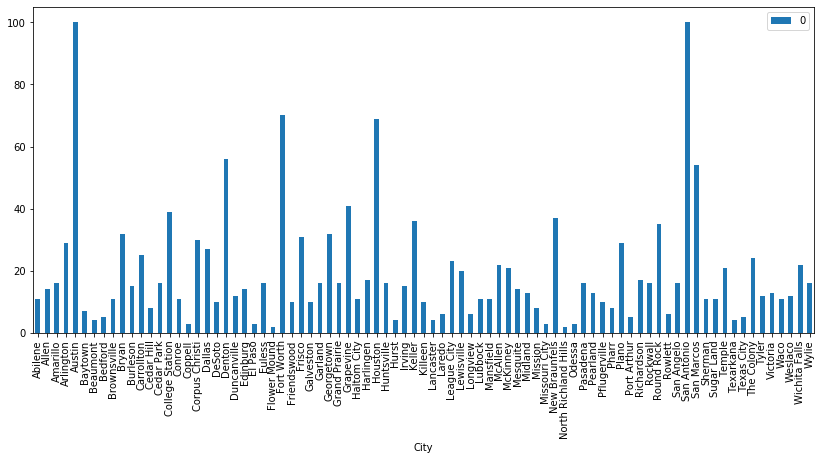

In [89]:
import matplotlib.pyplot as plt
count.plot(kind = 'bar', figsize = (14,6))

In [31]:
restaurants = texas_grouped.filter(regex='Restaurant', axis = 1)

In [32]:
restaurants.head()

,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,...,Russian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant
City,,,,,,,,,,,,,,,,,,,,,
Abilene,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Allen,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Amarillo,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Arlington,3,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Austin,3,0,0,1,0,0,0,0,0,0,...,1,2,0,0,3,0,0,0,0,0


In [33]:
restaurants['sum'] = restaurants.sum(axis=1)
restaurants.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant,sum
City,,,,,,,,,,,,,,,,,,,,,
Abilene,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Allen,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
Amarillo,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,6
Arlington,3,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,5
Austin,3,0,0,1,0,0,0,0,0,0,...,2,0,0,3,0,0,0,0,0,22


In [34]:
restaurants.reset_index(inplace=True)
restaurants.head()

,City,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant,sum
0,Abilene,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Allen,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
2,Amarillo,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,6
3,Arlington,3,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,5
4,Austin,3,0,0,1,0,0,0,0,0,...,2,0,0,3,0,0,0,0,0,22


In [35]:
df = pd.merge(left=restaurants,right=texas, left_on='City', right_on='City')
df.head()

,City,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,...,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant,sum,Rank,State,Growth From 2000 to 2013,Population,Latitude,Longitude
0,Abilene,0,0,0,0,0,0,0,0,0,...,0,0,0,1,221,Texas,3.6,120099,32.448736,-99.733144
1,Allen,0,1,0,0,1,0,0,1,0,...,0,0,0,6,328,Texas,104.0,92020,33.103174,-96.670550
2,Amarillo,0,0,0,0,0,0,0,5,0,...,0,0,0,6,120,Texas,12.8,196429,35.221997,-101.831297
3,Arlington,3,0,0,0,0,0,0,1,0,...,0,0,0,5,50,Texas,13.3,379577,32.735687,-97.108066
4,Austin,3,0,0,1,0,0,0,0,0,...,0,0,0,22,11,Texas,31.7,885400,30.267153,-97.743061


In [36]:
df.drop(['Rank','State','Growth From 2000 to 2013','Latitude','Longitude'], axis = 1, inplace = True)
df.head()

,City,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,...,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant,sum,Population
0,Abilene,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,120099
1,Allen,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,6,92020
2,Amarillo,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,6,196429
3,Arlington,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,5,379577
4,Austin,3,0,0,1,0,0,0,0,0,...,0,0,3,0,0,0,0,0,22,885400


In [39]:
df['Restaurants per 1000 pax'] = df['sum']/(df['Population']/100000)
df.head()

,City,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,...,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant,sum,Population,Restaurants per 1000 pax
0,Abilene,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,120099,0.832646
1,Allen,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,6,92020,6.520322
2,Amarillo,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,6,196429,3.054539
3,Arlington,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,5,379577,1.317256
4,Austin,3,0,0,1,0,0,0,0,0,...,0,3,0,0,0,0,0,22,885400,2.484753


In [40]:
df.sort_values(by=['Restaurants per 1000 pax'], inplace=True)
df

,City,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,...,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant,sum,Population,Restaurants per 1000 pax
23,El Paso,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,674433,0.000000
72,Sugar Land,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,83860,0.000000
16,Coppell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40342,0.000000
15,Conroe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,63032,0.000000
38,Hurst,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38448,0.000000
56,North Richland Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67317,0.000000
6,Beaumont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117796,0.000000
54,Missouri City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,70185,0.000000
42,Lancaster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38071,0.000000
47,Lubbock,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,239538,0.417470


In [42]:
df_top9 = df.head(9)
df_top9

,City,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Dim Sum Restaurant,Empanada Restaurant,Fast Food Restaurant,Fondue Restaurant,...,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vietnamese Restaurant,sum,Population,Restaurants per 1000 pax
23,El Paso,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,674433,0.0
72,Sugar Land,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,83860,0.0
16,Coppell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40342,0.0
15,Conroe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,63032,0.0
38,Hurst,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38448,0.0
56,North Richland Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67317,0.0
6,Beaumont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117796,0.0
54,Missouri City,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,70185,0.0
42,Lancaster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38071,0.0


In [55]:
df_top9 = df_top9[['City','Population']]
df_top9.set_index('City', inplace = True)

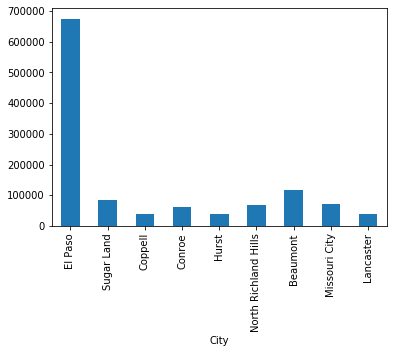

In [56]:
df_top9['Population'].plot(kind = 'bar')

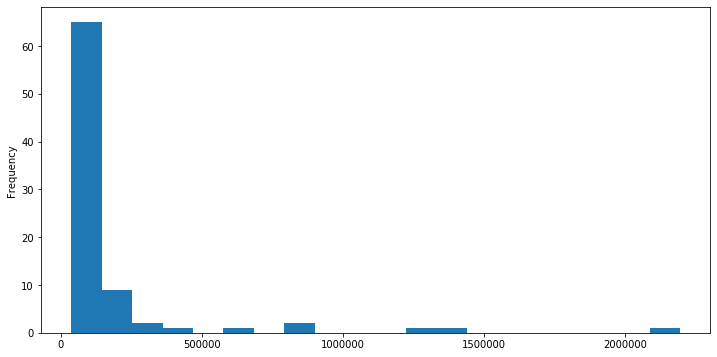

In [87]:
df_exp = df[['City','Population']] 
df_exp['Population'].plot(kind = 'hist', bins = 20, figsize = (12,6))

In [75]:
sum_column = pd.DataFrame(df.sum(axis=0))
sum_column.head()

,0
City,El PasoSugar LandCoppellConroeHurstNorth Richl...
American Restaurant,67
Asian Restaurant,3
Brazilian Restaurant,2
Cajun / Creole Restaurant,6


In [76]:
sum_column = sum_column.iloc[1:35]
sum_column.head()

,0
American Restaurant,67
Asian Restaurant,3
Brazilian Restaurant,2
Cajun / Creole Restaurant,6
Chinese Restaurant,16


In [77]:
sum_column.sort_values(by=[0], inplace=True, ascending = False)
sum_column.head()

,0
Mexican Restaurant,93
American Restaurant,67
Fast Food Restaurant,44
Italian Restaurant,31
Seafood Restaurant,28


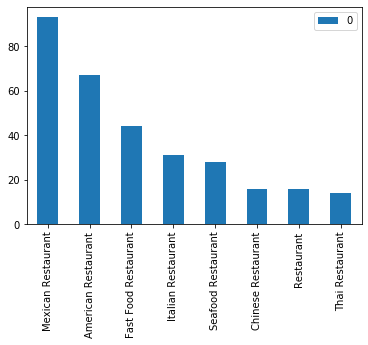

In [73]:
popular_cusines = sum_column.head(8)
popular_cusines.plot(kind = 'Bar')